### Tarea 1 Gradient Descent en Tensorflow -Estuardo Funes Solares 20032042

In [195]:
import os
import shutil
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn
from tensorflow import keras

from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

import datetime

# This disables CUDA/GPU for this notebook
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [196]:
df_training_data = np.load('C:/Users/EFunes/Documents/PERSONAL/U/Galileo/I Ciclo/Ciencia de Datos en Python/Proyecto/proyecto_training_data.npy')
df = pd.DataFrame (df_training_data,columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
df.head(20)

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0
7,200000.0,7.0,1107.0,7.0,1973.0,NaN
8,129900.0,7.0,1022.0,8.0,1931.0,51.0
9,118000.0,5.0,1077.0,5.0,1939.0,50.0


In [197]:
df.shape

(1460, 6)

In [198]:
df[['OverallQual','SalePrice']]

,OverallQual,SalePrice
0,7.0,208500.0
1,6.0,181500.0
2,7.0,223500.0
3,7.0,140000.0
4,8.0,250000.0
...,...,...
1455,6.0,175000.0
1456,6.0,210000.0
1457,7.0,266500.0
1458,5.0,142125.0


In [199]:
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)

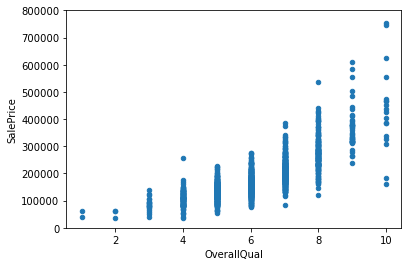

In [200]:
data.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0,800000));

In [201]:
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


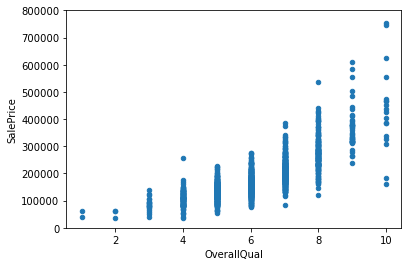

In [202]:
df.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0,800000));

In [203]:
def calc_mean_sq_error(data, slope, intercept):
    
    #Calcula MSE
    
    x, y = data['OverallQual'].values, data['SalePrice'].values
    diffs = (slope * x + intercept) - y
    mse = np.mean(diffs**2) 
    return mse
    
def draw_scatter(data, slope=None, intercept=None, ax=None):
    if ax is None:
        _,ax = plt.subplots(figsize=(4,4))
        
    sns.scatterplot(data['OverallQual'], data['SalePrice'], ax=ax, label='Sample Points')
    ax.set_xlabel('OverallQual (Escala)')
    ax.set_ylabel('SalePrice (USD)')
    ax.set_title('OverallQual vs. SalePrice')
    
    #A manera de prueba se colocan unos valores fijos (quemados).
    h0,h1 = 0, 20
    w0,w1 = 35000, 755000
    ax.set_xlim(h0, h1)
    ax.set_ylim(w0, w1)
    ax.set_aspect((h1-h0)/(w1-w0))
    
  
    if slope is not None and intercept is not None:
        pred_w0, pred_w1 = (slope*h0 + intercept, slope*h1 + intercept)
        ax.plot([h0, h1], [pred_w0, pred_w1], 'r-.', label='Fitted Line')
        mse = calc_mean_sq_error(data, slope, intercept)
        eqn_str = f'w = {slope:.2f} * h + {intercept:.1f}'
        ax.set_title(f'Loss: MSE={mse:.1f}\n{eqn_str}')
        
    ax.legend(loc='upper left')
    return ax

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


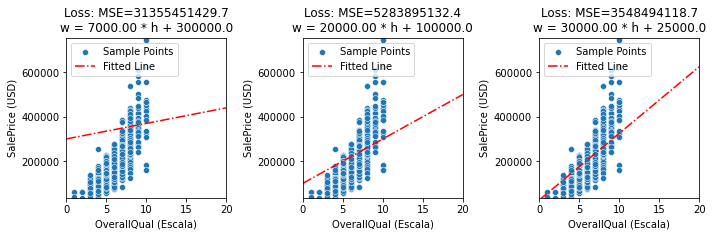

In [204]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))
draw_scatter(data, slope=7000,  intercept = 300000, ax=axs[0])
draw_scatter(data, slope=20000,  intercept = 100000, ax=axs[1])
draw_scatter(data, slope=30000,  intercept = 25000, ax=axs[2])
plt.tight_layout()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


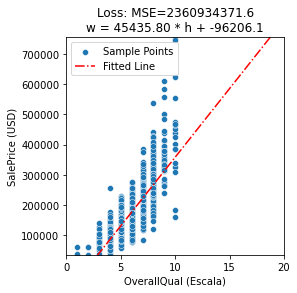

In [205]:
# Utilizando sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data['OverallQual'].values.reshape([-1, 1]), data['SalePrice'].values)

# Modelo con Parametros Optimos y Optimo Costo MSE
true_slope, true_intercept = lin_reg.coef_[0], lin_reg.intercept_
min_mse = calc_mean_sq_error(data, true_slope, true_intercept)

_ = draw_scatter(data, slope=true_slope, intercept=true_intercept)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


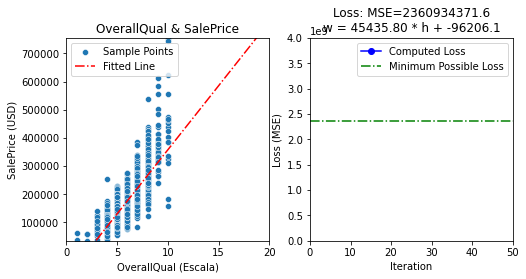

In [209]:
def draw_linreg_progress(data, slope, intercept, mse_hist, min_mse, file_out=None, n_iter=50, fig=None, axs=None):
    if fig is None or axs is None:
        fig, axs = plt.subplots(1, 2, figsize=(8,4))
        
    draw_scatter(data, slope, intercept, ax=axs[0])
    
    # Gráfica costo. Valores fijos por simplicidad
    hmin, hmax = 0, n_iter
    wmin, wmax = 0, 4000000000
    axs[1].plot(range(len(mse_hist)), mse_hist, 'b-', marker='o', label='Computed Loss')
    axs[1].plot([hmin, hmax], [min_mse, min_mse], 'g-.', label='Minimum Possible Loss')
    axs[1].set_xlim(hmin, hmax)
    axs[1].set_ylim(wmin, wmax)
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Loss (MSE)')
    axs[1].legend(loc='upper right')
    axs[1].set_aspect(hmax/float(wmax))
    
   
    mse = calc_mean_sq_error(data, slope, intercept) if len(mse_hist)==0 else mse_hist[-1]
    axs[0].set_title('OverallQual & SalePrice')
    eqn_str = f'w = {slope:.2f} * h + {intercept:.1f}'
    axs[1].set_title(f'Loss: MSE={mse:.1f}\n{eqn_str}')
    
    
    if file_out:
        fig.savefig(file_out)
        
    return fig, axs
    
_ = draw_linreg_progress(data, true_slope, true_intercept, [], min_mse)

### Tensorflow y Gradient Descent

In [206]:
df_training_data[0:, 0] /= 1000

x = df_training_data[:,1].reshape(-1, 1)
y = df_training_data[:,0].reshape(-1, 1)

In [207]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [208]:
def gradient_descent(x, y, epochs, lr, print_rate=100):
    #tf.reset_default_graph()
    tf.compat.v1.reset_default_graph()
    
    with tf.name_scope("input"):
        x = tf.concat([x, tf.ones_like(x)], axis = 1)
    with tf.name_scope("params"):
        params = tf.Variable(name="params", initial_value = tf.zeros((2, 1), tf.float64))
    with tf.name_scope("predict"):
        y_hat = tf.matmul(x, params)
    with tf.name_scope("error"):
        error = 1/2 * tf.reduce_mean(tf.math.square(y - y_hat))
    with tf.name_scope("gradient"):
        gradients = tf.gradients(error, params)
    with tf.name_scope("update_model"):
        fit = tf.scalar_mul(-lr, gradients[0])
        update_model = tf.compat.v1.assign(params, tf.add(params, fit))


    with tf.Session() as session:
        summary = tf.summary.scalar(name = "error_epochs", tensor = error)
        writer = tf.summary.FileWriter("./logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "_lr=" + str(lr) + "_epochs=" + str(epochs), session.graph)
        session.run(tf.global_variables_initializer())
        for epoch in range(0, epochs):
            if ((epoch + 1) % print_rate) == 0:
                print("error: " + str(session.run(error)))
      
            writer.add_summary(session.run(summary), epoch)
            session.run(update_model)

        params = session.run(params)

        writer.close()
    session.close()

    return params

In [216]:
gradient_descent(x,y,2000,0.0001,100)

error: 9599.05301291855
error: 5088.956758291789
error: 3068.2094907340493
error: 2162.7424082695334
error: 1756.944142179399
error: 1575.0080102649326
error: 1493.3668890924282
error: 1456.660140225012
error: 1440.0850474463577
error: 1432.5294785144497
error: 1429.0149672201512
error: 1427.311057159769
error: 1426.4184574105402
error: 1425.8894647618695
error: 1425.5234987571714
error: 1425.2306950675725
error: 1424.9707924895745
error: 1424.725753050429
error: 1424.4874952465477
error: 1424.2523982794783


array([[29.83108011],
       [ 3.67663506]])

In [217]:
gradient_descent(x,y,2000,0.049,100)

error: 1347.5938380611094
error: 1278.3680588506863
error: 1241.7699519692208
error: 1218.8555896826397
error: 1204.5063886622981
error: 1195.5207753152226
error: 1189.8938942701402
error: 1186.3702850213838
error: 1184.1637656301884
error: 1182.7820210949678
error: 1181.9167588324967
error: 1181.3749229404261
error: 1181.0356198797574
error: 1180.8231449059454
error: 1180.6900909499693
error: 1180.6067712305528
error: 1180.5545955880284
error: 1180.5219226782783
error: 1180.5014625750603
error: 1180.4886502535717


array([[ 45.2898101 ],
       [-95.27101687]])

In [ ]:
def test_hyper_parmas(lrs, epochs=1000):
    print_rate = epochs / 5
    for lr in lrs:
        print("lr=" + str(lr))
        gradient_descent(x, y, epochs, lr, print_rate)

In [ ]:
test_hyper_parmas([0.0001, 0.0005, 0.0009])

lr=0.0001
error: 5088.956758291789
error: 2162.7424082695334
error: 1575.0080102649326
error: 1456.660140225012
error: 1432.5294785144497
lr=0.0005
error: 1432.3470514335768
error: 1424.2614773656267
error: 1421.9446667905013
error: 1419.6515940904965
error: 1417.3802969582678
lr=0.0009
error: 1424.7427929227756
error: 1420.575283493906
error: 1416.4867205366024
error: 1412.467777671251
error: 1408.5172694029434


In [215]:
test_hyper_parmas([0.049], 2000)

lr=0.049
error: 1218.8555896826397
error: 1186.3702850213838
error: 1181.3749229404261
error: 1180.6067712305528
error: 1180.4886502535717


### Tensorboard

#### Imagen de Scalar

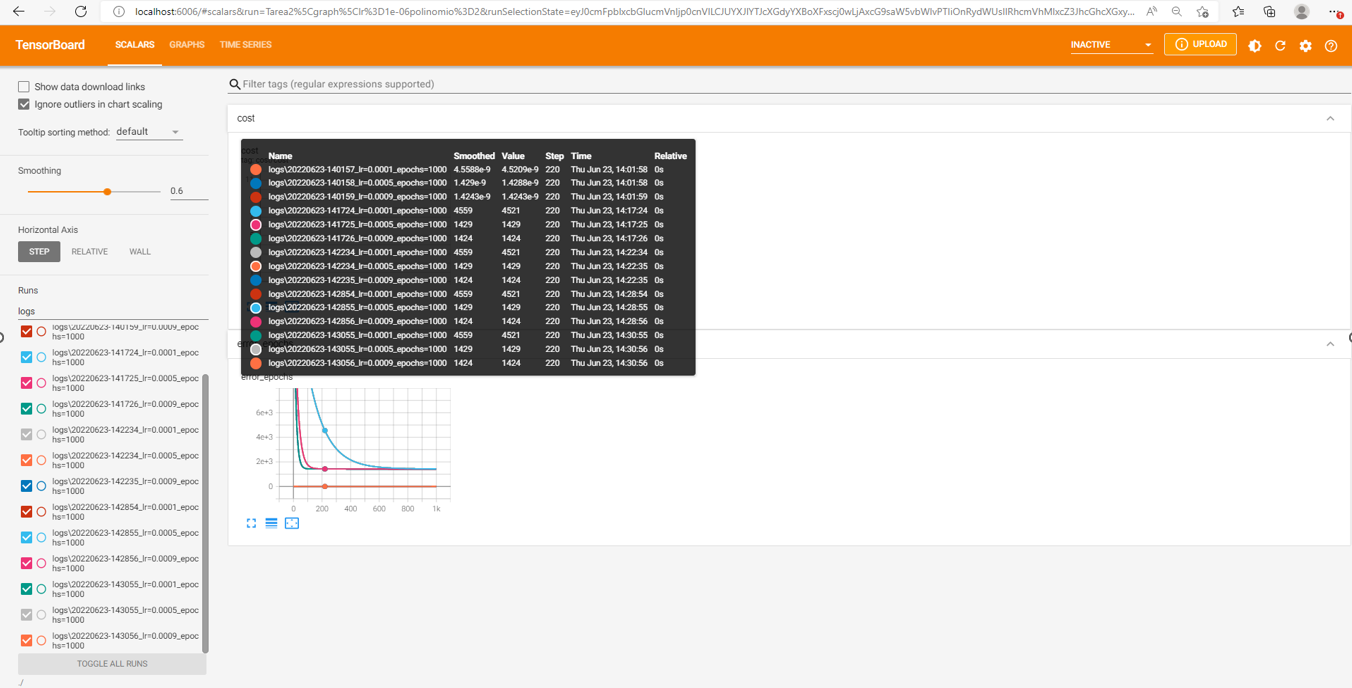

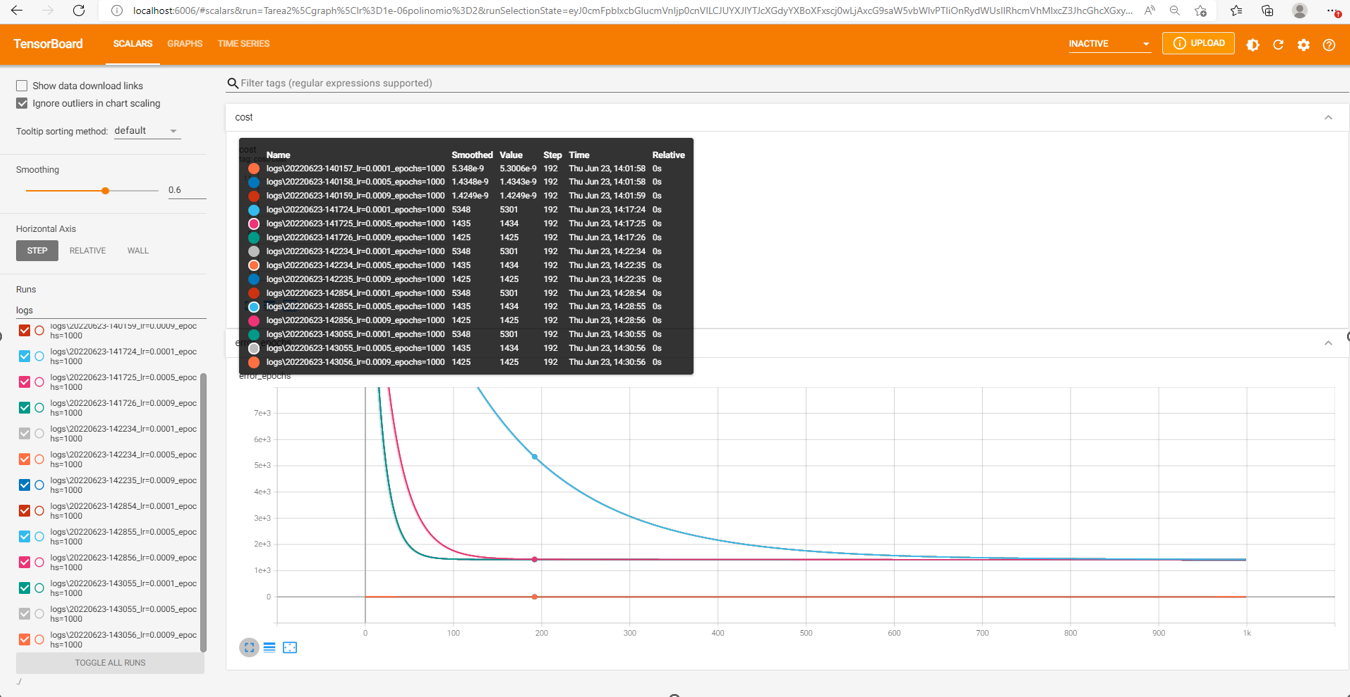

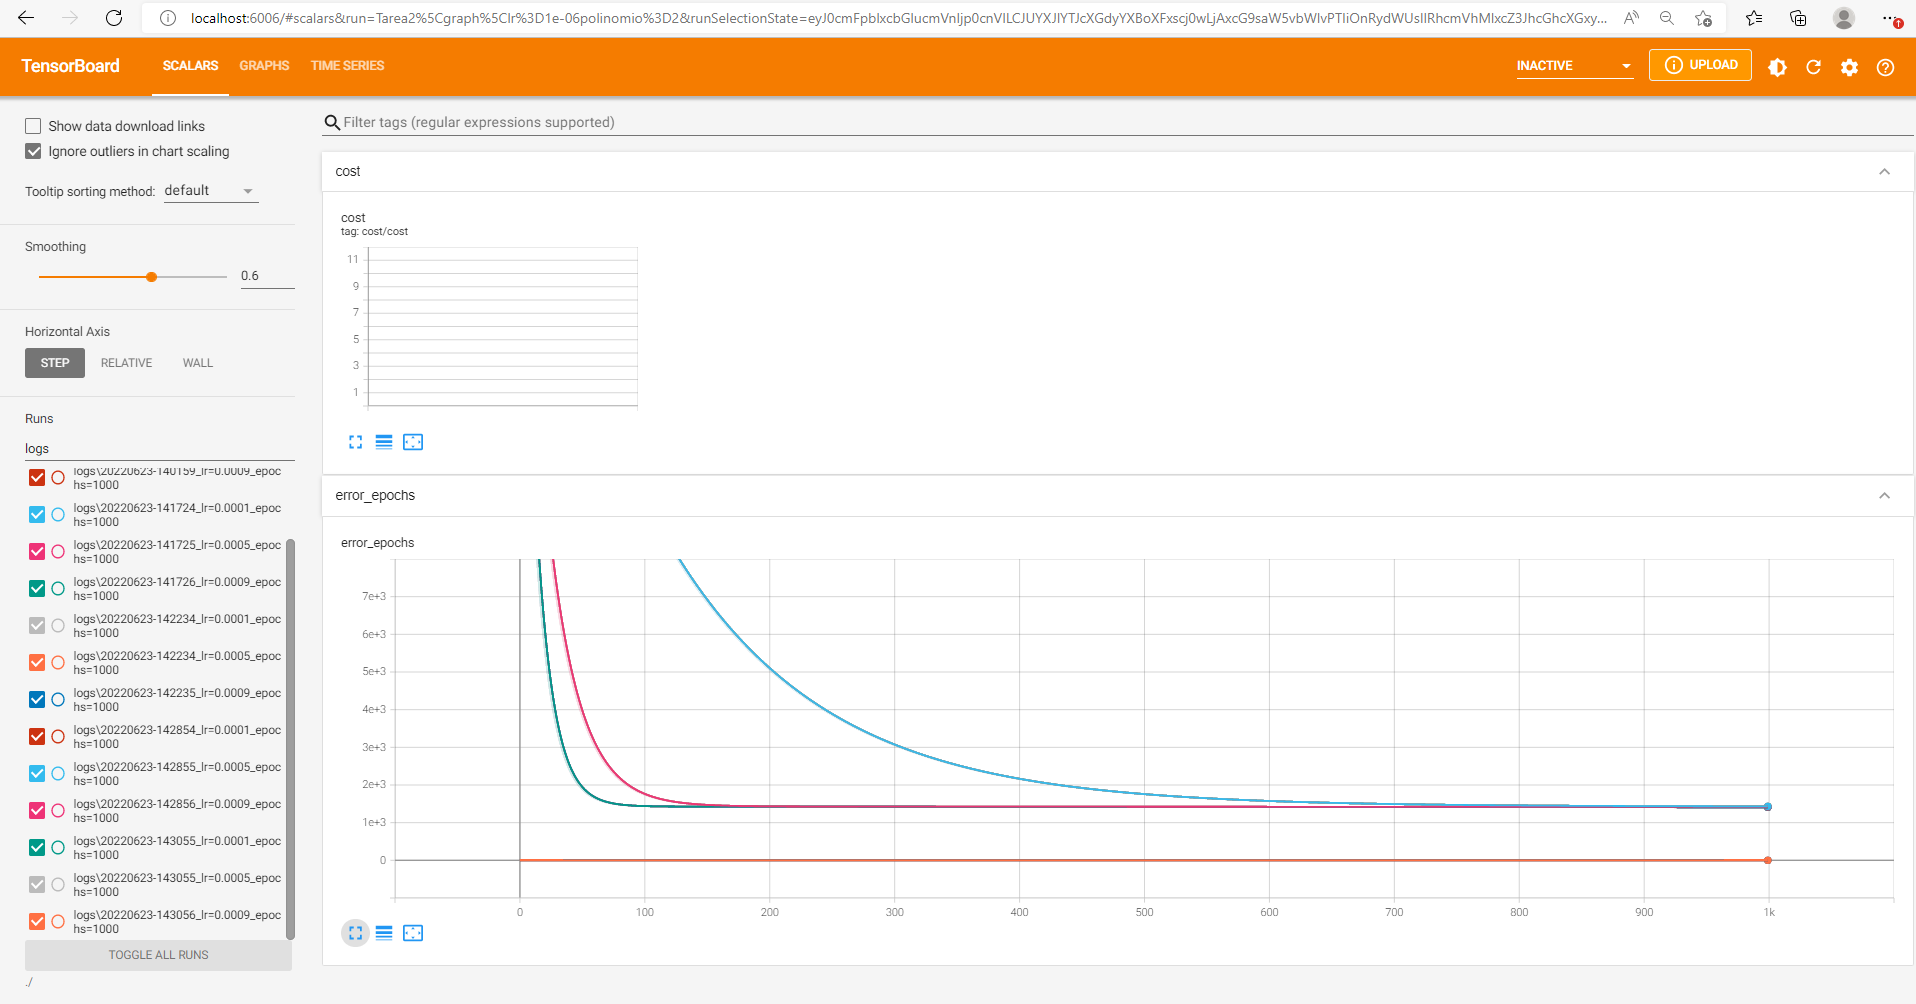

#### Imagen de Grafo

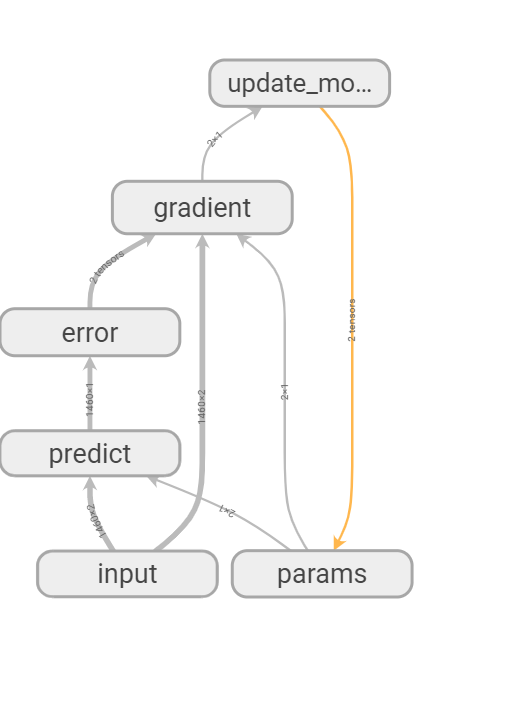

#### Imagen de Directorio de Logs

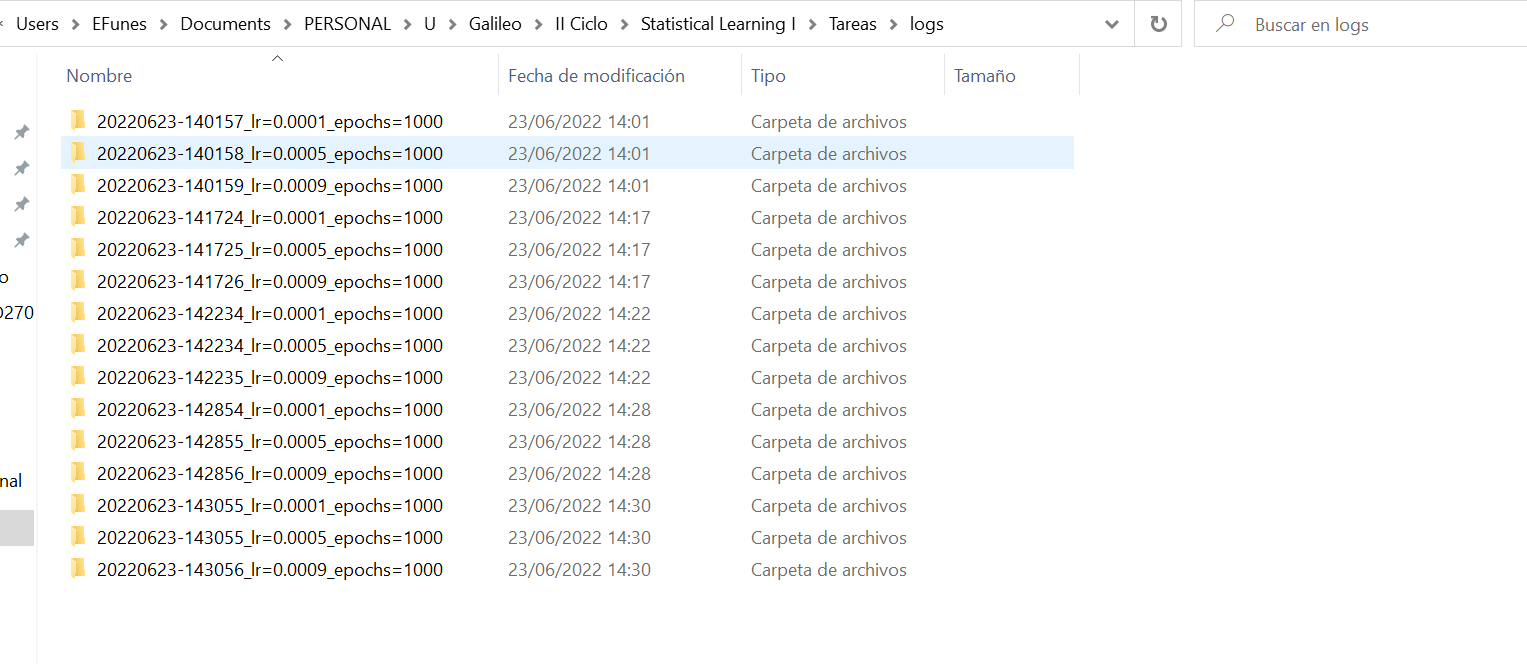

#### Conclusiones

1. Se demostró que un learning rate de 0.049 es bastante rápido en converger al minimo error
2. Usando el learning rate de 0.049 el error llega rapidamente a 1180
3. Con 2000 iteraciones es suficiente ya que el valor del error no baja de 1180. Es mínimo lo que disminuye. No son necesarias más epochs, no hará una gran diferencia.
4. Entonces los parametros del módelo quedarían en 45.2898101 y -95.27101687, con los hyper parametros 0.049 y 2000